# Patient and Site Analysis

In [46]:
import pandas as pd
import pyodbc
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conn = pyodbc.connect('DRIVER={SQL Server};Server=10.10.10.203;Database=sfls1_data;user=CDR_IIS_Account;password=eclinical.1;Trusted_Connection=false')
sql = 'select * from [Clintek_010].[DM]'
clintek10DMdf = pd.read_sql(sql, conn)

In [4]:
clintek10DMdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STUDYID   359 non-null    object
 1   DOMAIN    359 non-null    object
 2   USUBJID   359 non-null    object
 3   SUBJID    359 non-null    object
 4   RFSTDTC   267 non-null    object
 5   RFENDTC   267 non-null    object
 6   RFXSTDTC  267 non-null    object
 7   RFXENDTC  267 non-null    object
 8   RFICDTC   359 non-null    object
 9   RFPENDTC  359 non-null    object
 10  DTHDTC    193 non-null    object
 11  DTHFL     193 non-null    object
 12  SITEID    359 non-null    object
 13  BRTHDTC   359 non-null    object
 14  AGE       359 non-null    int64 
 15  AGEU      359 non-null    object
 16  SEX       359 non-null    object
 17  RACE      339 non-null    object
 18  ETHNIC    354 non-null    object
 19  ARMCD     359 non-null    object
 20  ARM       359 non-null    object
 21  ACTARMCD  359 no

In [42]:
clintek10DMdf.shape[0]

359

In [5]:
dfdm1 = clintek10DMdf[['USUBJID', 'ARM', 'SEX', 'AGE', 'RACE', 'DTHFL', 'DTHDTC', 'SITEID']]

In [8]:
dfdm1['DTHFL'].describe

<bound method NDFrame.describe of 0      None
1      None
2         Y
3      None
4      None
       ... 
354       Y
355    None
356    None
357       Y
358       Y
Name: DTHFL, Length: 359, dtype: object>

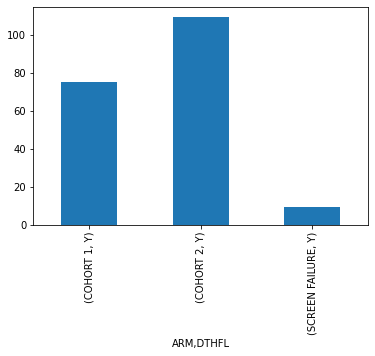

In [24]:
dfdm1.groupby(['ARM']).DTHFL.value_counts().plot.bar()

In [39]:
dfdm1[~dfdm1.DTHFL.eq('Y')].groupby('ARM').count()

USUBJID  SEX  AGE  RACE  DTHFL  DTHDTC  SITEID
ARM                                                           
COHORT 1             18   18   18    18      0       0      18
COHORT 2             65   65   65    60      0       0      65
SCREEN FAILURE       83   83   83    80      0       0      83

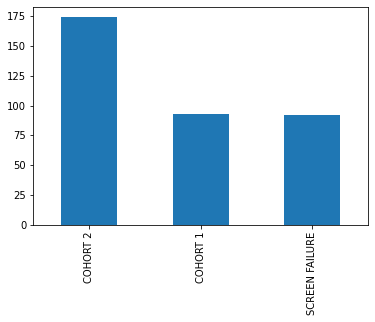

In [41]:
dfdm1.ARM.value_counts().plot.bar()

Total Subjects: 359
COHORT 2          0.484680
COHORT 1          0.259053
SCREEN FAILURE    0.256267
Name: ARM, dtype: float64


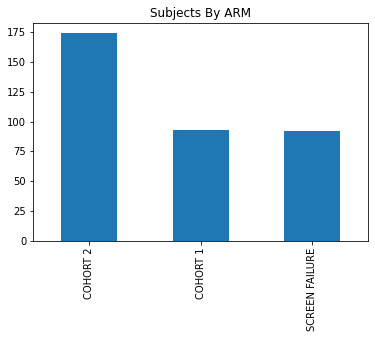

In [58]:
armcounts = dfdm1.ARM.value_counts()
total_subjects = dfdm1.shape[0]
armpcts = armcounts / total_subjects
plt.title('Subjects By ARM')
armcounts.plot.bar()
print('Total Subjects: ' + str(total_subjects))
print(armpcts)

COHORT 2          109
COHORT 1           75
SCREEN FAILURE      9
Name: ARM, dtype: int64
COHORT 2          0.626437
COHORT 1          0.806452
SCREEN FAILURE    0.097826
Name: ARM, dtype: float64


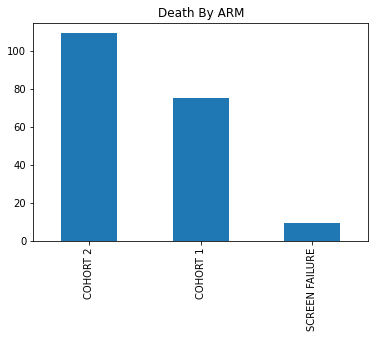

In [64]:
deceasedcounts = deceased.ARM.value_counts()
deceasedpcts = deceasedcounts / armcounts
print(deceasedcounts)
print(deceasedpcts)
plt.title('Death By ARM')
deceasedcounts.plot.bar()

In [79]:
deceasedsitecounts = deceased.SITEID.value_counts()
totalsitecounts =  dfdm1.SITEID.value_counts()
#deceasedsitepcts = deceasedsitecounts / totalsitecounts
#print(deceasedsitecounts)
#print(deceasedsitepcts)
#plt.title('Death By SITE')
#deceasedsitecounts.plot.barh()

deceasedsitecounts.head(5)

00987    14
00005    11
00582     8
00308     8
00606     7
Name: SITEID, dtype: int64

In [76]:
totalsitecounts.head(5)

00987    19
00005    16
00582    12
00301    11
00308    11
Name: SITEID, dtype: int64

In [91]:
dfsitedcount = pd.DataFrame(dfdm1.SITEID.value_counts().reset_index())
dfsitedcount.columns = ['SITEID', 'SUBJECTCOUNT']
dfsitedeathcount = pd.DataFrame(deceased.SITEID.value_counts().reset_index())
dfsitedeathcount.columns = ['SITEID', 'DEATHCOUNT']
dfcompare = pd.merge(dfsitedcount, dfsitedeathcount, on='SITEID', how='left')

In [95]:
dfcompare.tail(25)

SITEID  SUBJECTCOUNT  DEATHCOUNT
75  08801             1         NaN
76  08805             1         NaN
77  07801             1         1.0
78  08309             1         1.0
79  08132             1         1.0
80  00064             1         1.0
81  00085             1         1.0
82  08888             1         NaN
83  08102             1         1.0
84  08307             1         NaN
85  02686             1         1.0
86  00529             1         1.0
87  00736             1         NaN
88  08108             1         NaN
89  07007             1         1.0
90  08305             1         1.0
91  02602             1         NaN
92  02688             1         NaN
93  00042             1         NaN
94  00047             1         1.0
95  02689             1         NaN
96  07902             1         NaN
97  02608             1         1.0
98  00678             1         NaN
99  02683             1         NaN

In [96]:
dfcompare['MORTALITYRATE'] = dfcompare.DEATHCOUNT / dfcompare.SUBJECTCOUNT

In [100]:
dfcompare.sort_values('MORTALITYRATE', ascending=False).head(50)

SITEID  SUBJECTCOUNT  DEATHCOUNT  MORTALITYRATE
38  00972             3         3.0       1.000000
41  00592             3         3.0       1.000000
46  00986             2         2.0       1.000000
65  00709             2         2.0       1.000000
66  07804             2         2.0       1.000000
71  00488             1         1.0       1.000000
73  00048             1         1.0       1.000000
74  08103             1         1.0       1.000000
77  07801             1         1.0       1.000000
78  08309             1         1.0       1.000000
79  08132             1         1.0       1.000000
80  00064             1         1.0       1.000000
81  00085             1         1.0       1.000000
83  08102             1         1.0       1.000000
85  02686             1         1.0       1.000000
86  00529             1         1.0       1.000000
89  07007             1         1.0       1.000000
90  08305             1         1.0       1.000000
94  00047             1         1.0       1.000000
44  00029             2         2.0       1.000000
97  02608             1         1.0       1.000000
17  00003             7         7.0       1.000000
24  08109             5         4.0       0.800000
25  00096             5         4.0       0.800000
8   00606             9         7.0       0.777778
26  00490             4         3.0       0.750000
30  02607             4         3.0       0.750000
0   00987            19        14.0       0.736842
4   00308            11         8.0       0.727273
16  00539             7         5.0       0.714286
1   00005            16        11.0       0.687500
18  00607             6         4.0       0.666667
19  08773             6         4.0       0.666667
39  00587             3         2.0       0.666667
36  00485             3         2.0       0.666667
34  07880             3         2.0       0.666667
32  00681             3         2.0       0.666667
2   00582            12         8.0       0.666667
11  00686             8         5.0       0.625000
6   00074            10         6.0       0.600000
14  00800             7         4.0       0.571429
15  00970             7         4.0       0.571429
57  02684             2         1.0       0.500000
68  08183             2         1.0       0.500000
67  00738             2         1.0       0.500000
64  00688             2         1.0       0.500000
60  08107             2         1.0       0.500000
59  07000             2         1.0       0.500000
58  00577             2         1.0       0.500000
21  00683             6         3.0       0.500000

In [103]:
dfcompare.sort_values(['SUBJECTCOUNT','MORTALITYRATE'], ascending=False).head(10)

SITEID  SUBJECTCOUNT  DEATHCOUNT  MORTALITYRATE
0   00987            19        14.0       0.736842
1   00005            16        11.0       0.687500
2   00582            12         8.0       0.666667
4   00308            11         8.0       0.727273
3   00301            11         5.0       0.454545
5   00473            11         4.0       0.363636
6   00074            10         6.0       0.600000
8   00606             9         7.0       0.777778
7   00583             9         3.0       0.333333
11  00686             8         5.0       0.625000

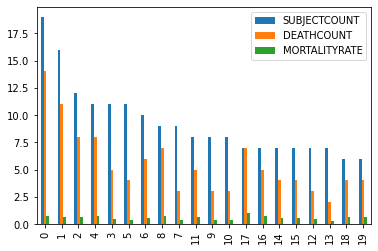

In [106]:
dfsortedmortality = dfcompare.sort_values(['SUBJECTCOUNT','MORTALITYRATE'], ascending=False)
dfsortedmortality.set_index('SITEID')
dfsortedmortality.head(20).plot.bar()